## Importujeme potrebné balíky

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Načítavanie dát z Yahoo Finance

In [2]:
# načítať indexy SPX, FTSE

In [1]:
# závierkové ceny

In [5]:
# opraviť, vymazať 

## Vytvorenie výnosov

## Rozdelenie dát 80/20

## Fitovanie modelu ARIMA(1,0,0)

In [8]:
#fitni model AR(1)

## Jednoduchá prognóza

In [3]:
# spodné dáta

In [4]:
# vytvorte premenné, ktoré nám pomôžu ľahko meniť obdobia namiesto toho, aby sme ich zakaždým zadávali
# uistite sa, že dátumy začiatku a ukončenia sú pracovné dni, inak kód spôsobí chybu
start_date = "2014-07-15"
end_date_a = "2015-01-01"

In [11]:
end_date = "2019-10-23"
df_pred = results_ar.predict(start = start_date, end = end_date)

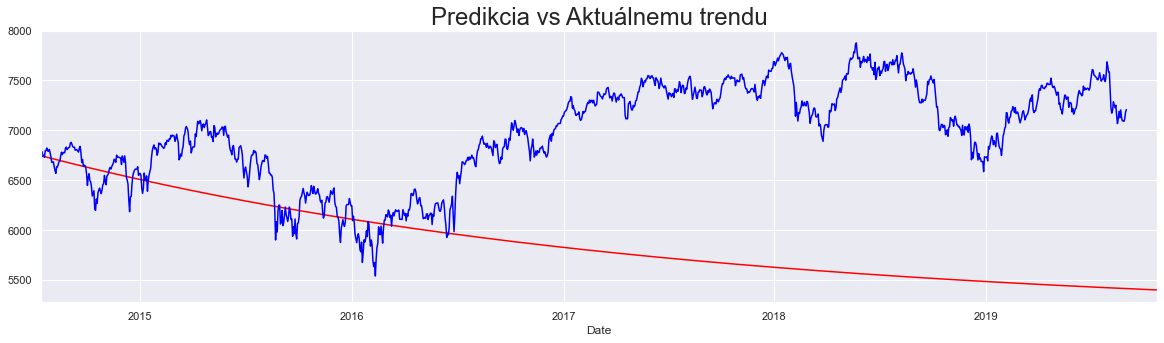

In [12]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ftse[start_date:end_date].plot(color = "blue")
plt.title("Predikcia vs Aktuálnemu trendu", size = 24)
plt.show()

### Použitie výnosy namiesto cien

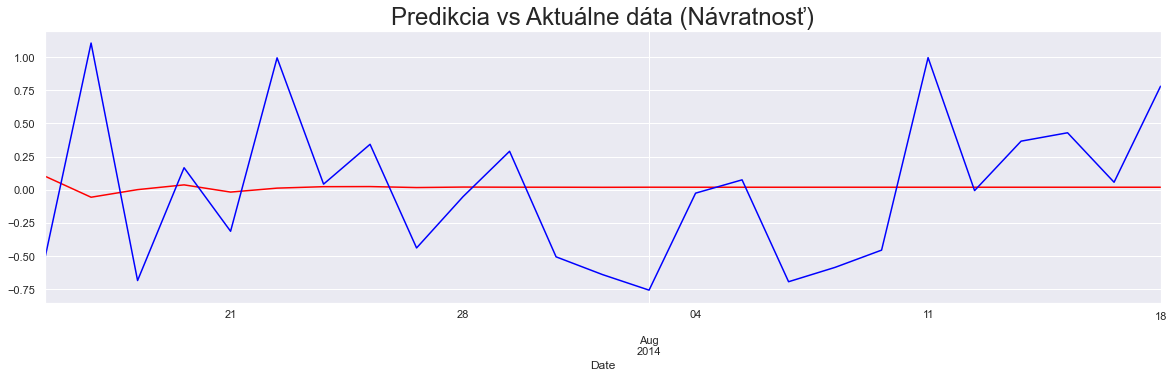

In [13]:
end_date = "2014-08-18"
# použi výnosy

In [5]:
# sumarizácia ARMA(5,0)

In [ ]:
# optional -> MA  , ARMA, ARMAX, 

### ARIMA

In [6]:
model_ret_armax = ARIMA(df.ret_ftse[1:], exog = df[["ret_spx","ret_dax","ret_nikkei"]][1:], order = (1,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start = start_date, end = end_date, 
                                          exog = df_test[["ret_spx","ret_dax","ret_nikkei"]][start_date:end_date]) 

df_pred_armax[start_date:end_date].plot(figsize = (20,5), color = "red")
df_test.ret_ftse[start_date:end_date].plot(color = "blue")
# pomenovať a vykresliť

NameError: name 'ARIMA' is not defined

In [22]:
# sumarizácia

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5351
Model:                     ARMA(1, 1)   Log Likelihood               -5563.206
Method:                       css-mle   S.D. of innovations              0.684
Date:                Mon, 02 May 2022   AIC                          11140.412
Time:                        18:14:55   BIC                          11186.507
Sample:                    01-10-1994   HQIC                         11156.512
                         - 07-14-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0061      0.007     -0.811      0.418      -0.021       0.009
ret_spx            0.1054      0.010     10.394      0.000       0.086       0.125
ret_dax            0.5483      0.008     66.525      0.000       0.532       0.564
ret_nikkei         0.0745      0.007     11.306      0.000       0.062       0.087
ar.L1.ret_ftse     0.4120      0.098      4.207      0.000       0.220       0.604
ma.L1.ret_ftse    -0.5301      0.091     -5.814      0.000      -0.709      -0.351
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4271           +0.0000j            2.4271            0.0000
MA.1            1.8866           +0.0000j            1.8866            0.0000
-----------------------------------------------------------------------------
"""

### Auto ARIMA hodnoty FTSE

In [ ]:
# 3exog m = 5, max_p = 5, max_q = 5

In [ ]:
df_auto_pred_ftse = pd.DataFrame(model_auto_ftse.predict(n_periods = len(df_test[start_date:end_date]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date]),
                            index = df_test[start_date:end_date].index)

In [ ]:
# sumarizácia

In [ ]:
# vykresli modrou a červenou

### Auto ARIMA výnosov FTSE s 3exog

In [ ]:
# exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],                        max_p = 5, max_q = 5)

In [ ]:
df_auto_pred_ret = pd.DataFrame(model_auto_ret.predict(n_periods = len(df_test[start_date:end_date_a]),
                            exogenous = df_test[['ret_spx', 'ret_dax', 'ret_nikkei']][start_date:end_date_a]),
                            index = df_test[start_date:end_date_a].index)

In [ ]:
# vykresli predikciu

In [ ]:
model_auto_ret.summary()

### Porovnanie všetkých modelov (výnosy)

In [ ]:
end_date = "2015-01-01"
df_pred_ar[start_date:end_date].plot(figsize = (20,10), color = "yellow")
df_pred_ma[start_date:end_date].plot(color = "pink")
df_pred_arma[start_date:end_date].plot(color = "cyan")
df_pred_armax[start_date:end_date].plot(color = "green")

df_test.ret_ftse[start_date:end_date].plot(color = "blue")
plt.legend(['AR','MA','ARMA','ARMAX'])
plt.title("Všetky modely", size = 24)
plt.show()